# Toomre density wave dispersion relation

Figure 8.5 from Chapter 8 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots the Toomre density wave dispersion relation of Equation 8.89

 > $s^2 = 1 - 2 \frac{|k|}{k_\mathrm{crit}} + Q^2 \frac{k^2}{k_\mathrm{crit}^2}$

for a warm disk (Q = 1.2), a critical disk (Q = 1), a cool disk (Q = 0.8) and an “absolute zero” disk (Q = 0). Waves are unstable below the dashed horizontal line denoting s=0.

In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [5]:
plotFile = 'Fig8_5.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Toomre dispersion relation

The dispersion relation, Equation 8.89, for density waves is

 > $s^2 = 1 - 2 \frac{|k|}{k_\mathrm{crit}} + Q^2 \frac{k^2}{k_\mathrm{crit}^2}$

where $Q$ is Toomre's Q parameter.  We compute $s^2$ for 4 values of $Q$:
 * a warm disk (Q = 1.2)
 * a critical disk (Q = 1),
 * a cool disk (Q = 0.8)
 * an “absolute zero” disk (Q = 0)

We compute $s^2$ as a function of $k/k_{\rm crit}$ from 0 to 3.5

In [6]:
plotQ = ['1.2','1','0.8','0']
labXY = {'1.2':(1.9,3),'1':(2.5,2.6),'0.8':(3.2,1.5),'0':(2.4,-3.5)}

kMin = 0
kMax = 3.5

k_kcrit = np.linspace(kMin,kMax,301)

s2 = {}
for Q in plotQ:
    s2[Q] = 1.0 - 2.0*k_kcrit + (float(Q)*k_kcrit)**2
    
# plotting limits

s2Min = -4.5
s2Max = 4.5

### Figure 8.5

Plot and label curves for the different Q as solid lines and $s^2=0$ as a dashed horizontal line
 

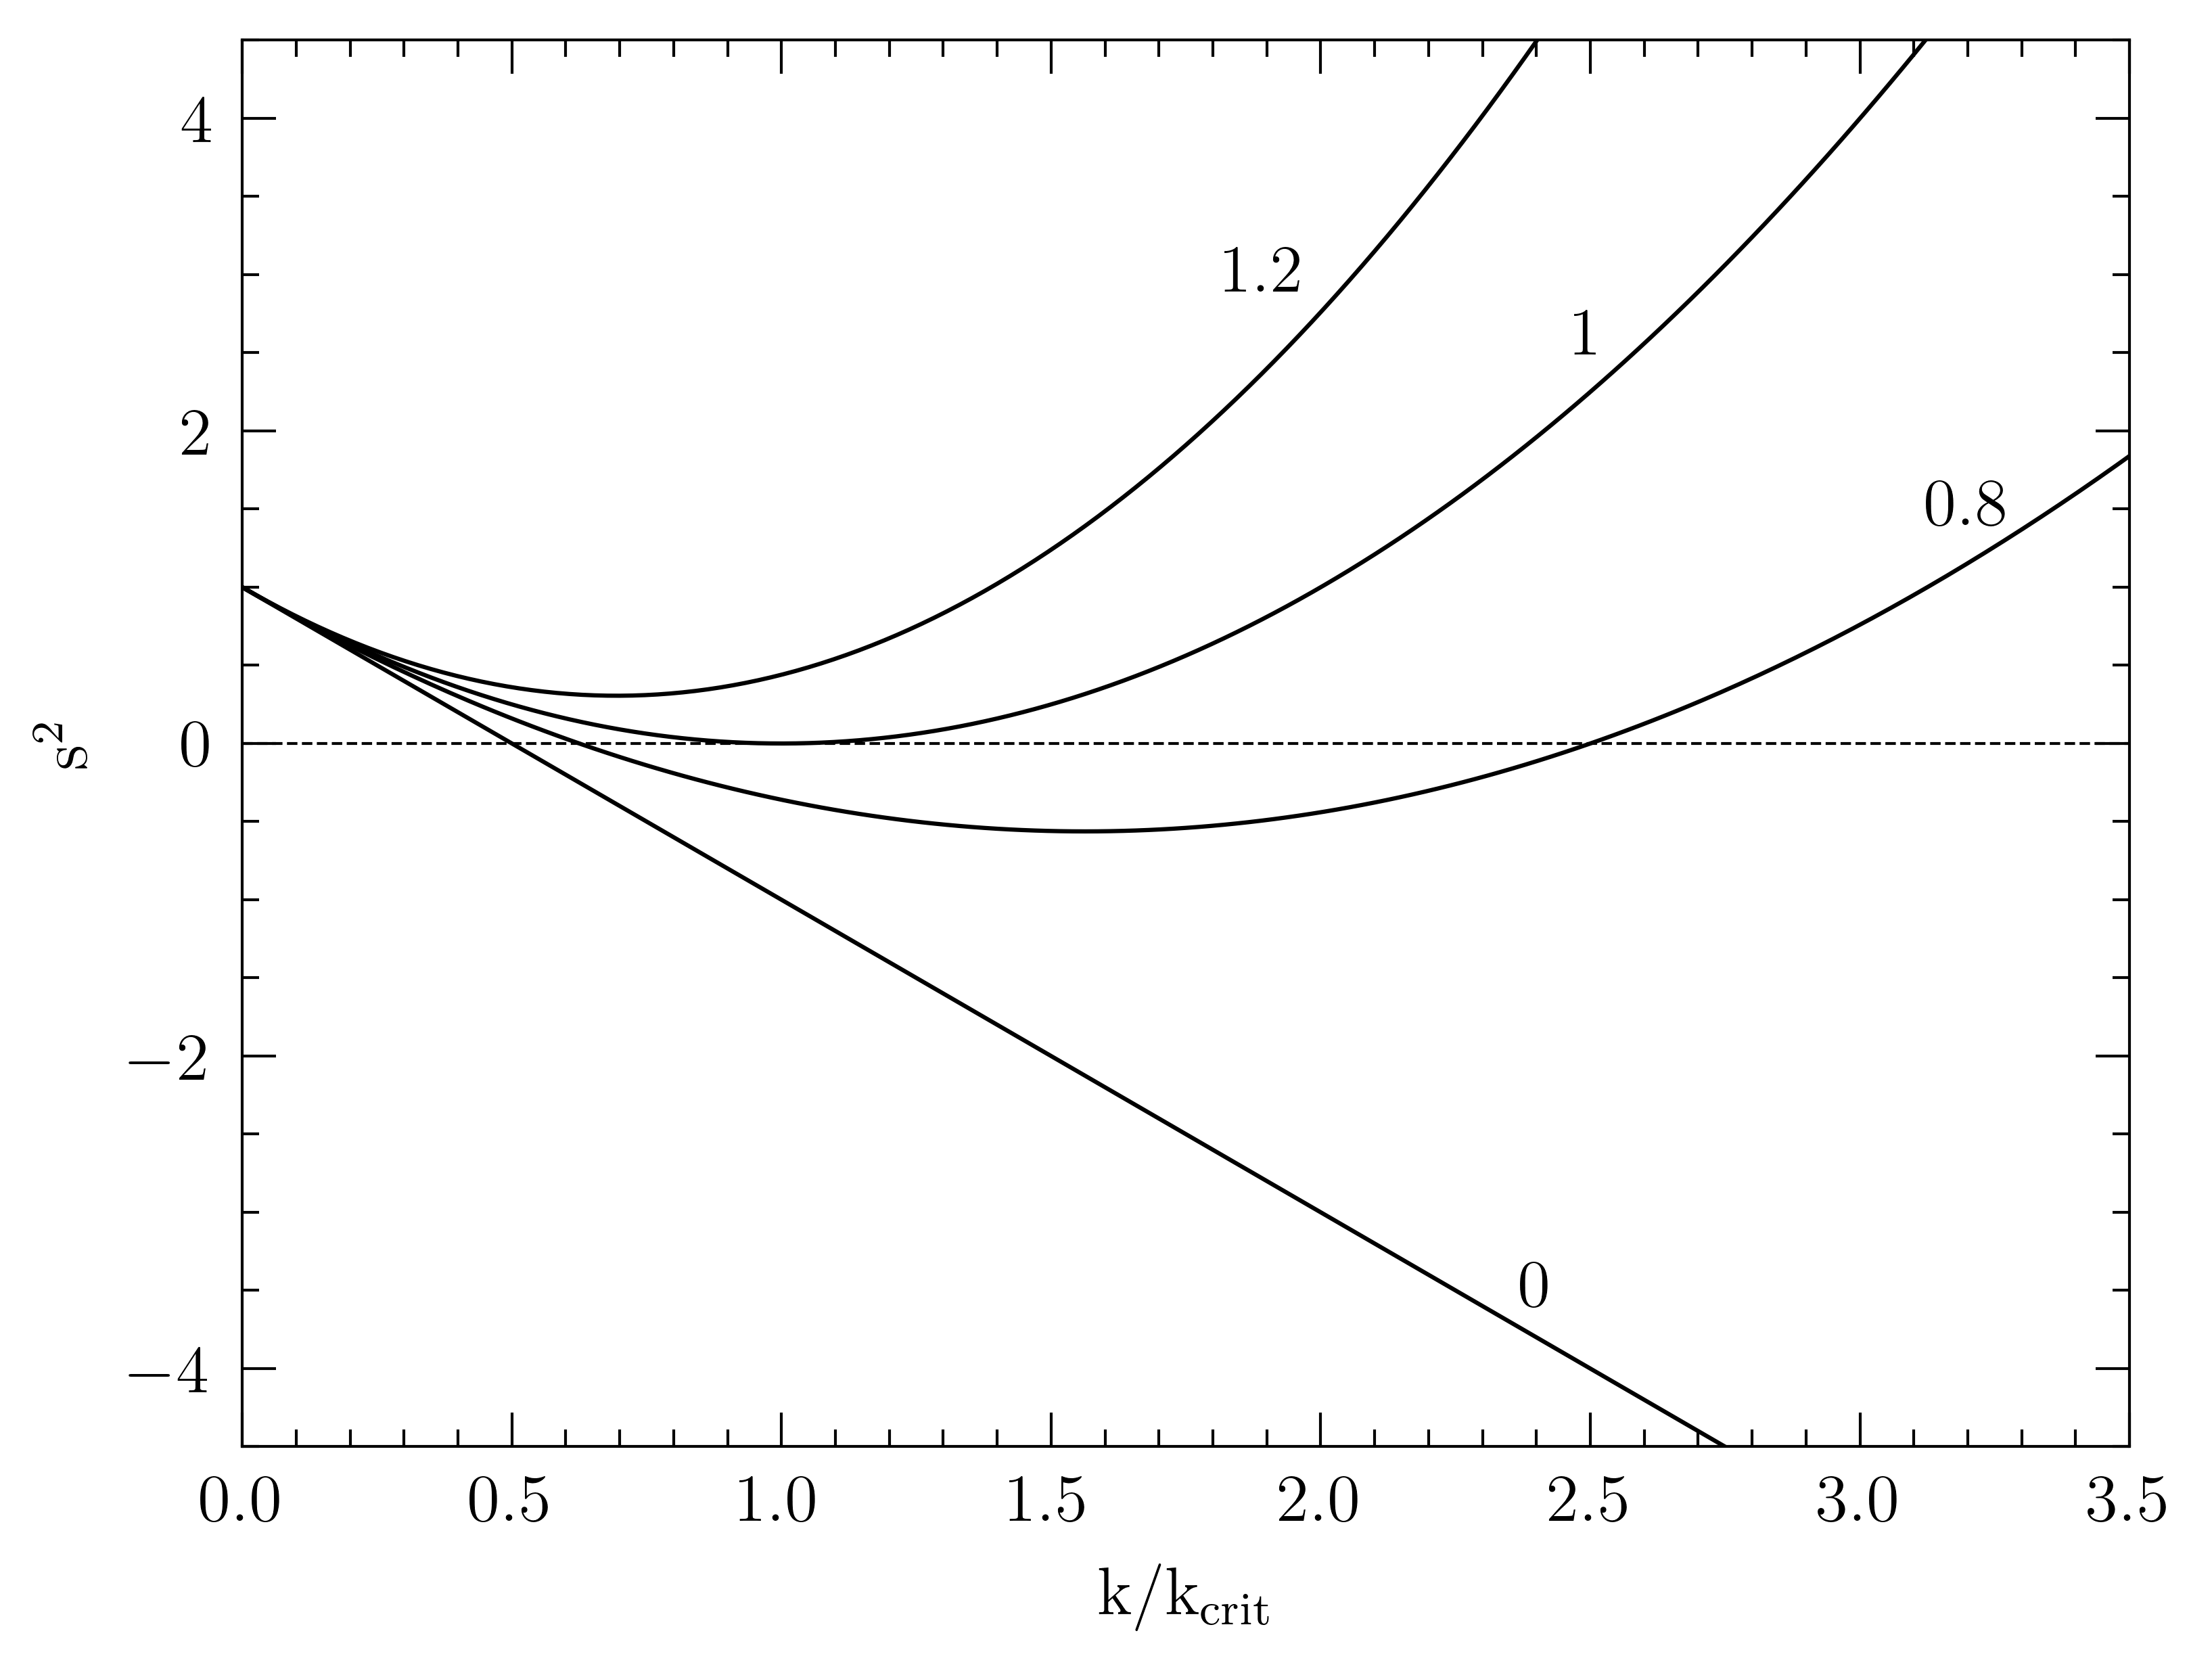

In [7]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(kMin,kMax)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlabel(r'k/k$_{\rm crit}$',fontsize=axisFontSize)

ax.set_ylim(s2Min,s2Max)
ax.yaxis.set_major_locator(MultipleLocator(2.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r's$^2$',fontsize=axisFontSize)

for Q in plotQ:
    ax.plot(k_kcrit,s2[Q],ls='-',lw=0.75,color='black',zorder=10)
    ax.text(labXY[Q][0],labXY[Q][1],Q,ha='center',va='center',fontsize=axisFontSize)
    
ax.hlines(0,kMin,kMax,ls=['--'],colors=['black'],lw=0.5,zorder=9)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')